# **Comparison of Covid19 trend in Italy and Sweden**

We first compare the 16-day trend of cases in Italy and Sweden since the day they reached 1000 (March 3 for Italy, March 15 for Sweden). 

Since mid March, Sweden only tests:

*   Hospitalized patients from risk groups (elderly, immunocompromised, etc.)
*   Healthcare personnel with symptoms

so the active cases for Sweden [1] have been compared to the numbers of hospitalized patients in Italy [2]. The active cases for Sweden are calculated as: total cases - deaths - recoveries.

The graphs also show intensive care unit cases for the same time period (March 3 - March 18 for Italy, March 15 - March 30 for Sweden).

[1] [C19.SE - Coronavirus i Sverige](https://c19.se/)

[2] [Il Sole 24 Ore - Coronavirus in Italia](https://lab24.ilsole24ore.com/coronavirus/)



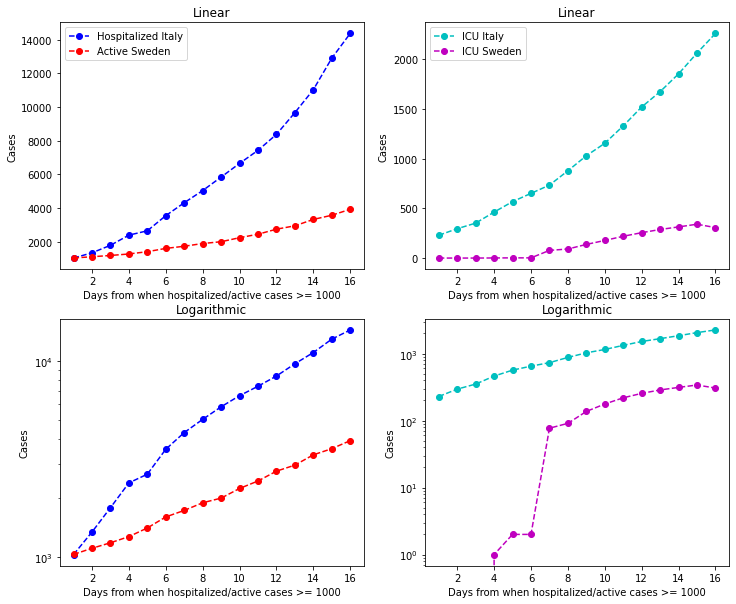

In [71]:
import numpy as np
import matplotlib.pyplot as plt

italy_hospitalized = [1034, 1346, 1790, 2394, 2651, 3550, 4316,
                     5038, 5838, 6650, 7426, 8372, 9663, 11025, 
                     12894, 14363]

sweden_active = [1036, 1113, 1187, 1276, 1412, 1607, 1734,
                1897, 2003, 2243, 2448, 2747, 2948, 3326, 
                3574, 3928]

italy_icu = [229, 295, 351, 462, 567, 
             650, 733, 877, 1028, 1153, 
             1328, 1518, 1672, 1851, 2060,
             2257]

sweden_icu = [0, 0, 0, 1, 2, 2,
              77, 91, 137, 177, 
              219, 255, 287, 313, 
              340, 306]

x = np.arange(1, len(italy_hospitalized) + 1)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(x, italy_hospitalized, '--bo', label='Hospitalized Italy')
ax1.plot(x, sweden_active, '--ro', label='Active Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax1.set_ylabel('Cases')

ax2 = fig.add_subplot(223)
ax2.plot(x, italy_hospitalized, '--bo')
ax2.plot(x, sweden_active, '--ro')
ax2.set_title('Logarithmic')
ax2.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax2.set_ylabel('Cases')
ax2.set_yscale('log')

ax3 = fig.add_subplot(222)
ax3.plot(x, italy_icu, '--co', label='ICU Italy')
ax3.plot(x, sweden_icu, '--mo', label='ICU Sweden')
ax3.legend(loc="upper left")
ax3.set_title('Linear')
ax3.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax3.set_ylabel('Cases')

ax4 = fig.add_subplot(224)
ax4.plot(x, italy_icu, '--co')
ax4.plot(x, sweden_icu, '--mo')
ax4.set_title('Logarithmic')
ax4.set_xlabel('Days from when hospitalized/active cases >= 1000')
ax4.set_ylabel('Cases')
ax4.set_yscale('log')

fig.set_figheight(10)
fig.set_figwidth(12)
plt.show()

We compare the least-squares best exponential and quadratic fit to the Swedish data and see the predicted number of active cases for April 3 for both models.

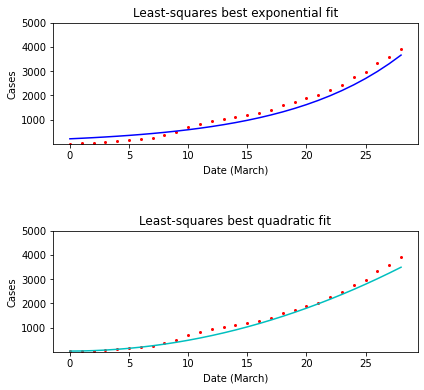

Predicted number of cases for April 3rd for the exponential model: 5508
Predicted number of cases for April 3rd for the quadratic model: 4544


In [72]:
import numpy as np
import matplotlib.pyplot as plt

sweden_active = [15, 29, 51, 93, 136, 160, 202, 259, 354, 498, 685,
                812, 958, 1036, 1113, 1187, 1276, 1412, 1607, 1734,
                1897, 2003, 2243, 2448, 2747, 2948, 3326, 
                3574, 3928]

x = np.arange(len(sweden_active))
exp_fit = [211.236 * np.exp(0.101904 * i) for i in x]
quad_fit = [4.38197 * i**2 + 0.818311 * i + 30.5966 for i in x]

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(x, sweden_active, 'or', markersize=2)
ax1.plot(x, exp_fit, '-b')
ax1.set_title('Least-squares best exponential fit')
ax1.set_xlabel('Date (March)')
ax1.set_ylabel('Cases')
ax1.set_ylim(1, 5000)

ax2 = fig.add_subplot(212)
ax2.plot(x, sweden_active, 'or', markersize=2)
ax2.plot(x, quad_fit, '-c')
ax2.set_title('Least-squares best quadratic fit')
ax2.set_xlabel('Date (March)')
ax2.set_ylabel('Cases')
ax2.set_ylim(1, 5000)
fig.tight_layout()

fig.set_figheight(6)
fig.set_figwidth(6)
plt.show()

print("Predicted number of cases for April 3rd for the exponential model: {:.0f}".format(211.236 * np.exp(0.101904 * 32)))
print("Predicted number of cases for April 3rd for the quadratic model: {:.0f}".format(4.38197 * 32**2 + 0.818311 * 32 + 30.5966))

We then compare the same data for the two countries from March 2nd (the first day reported for Sweden) until today:

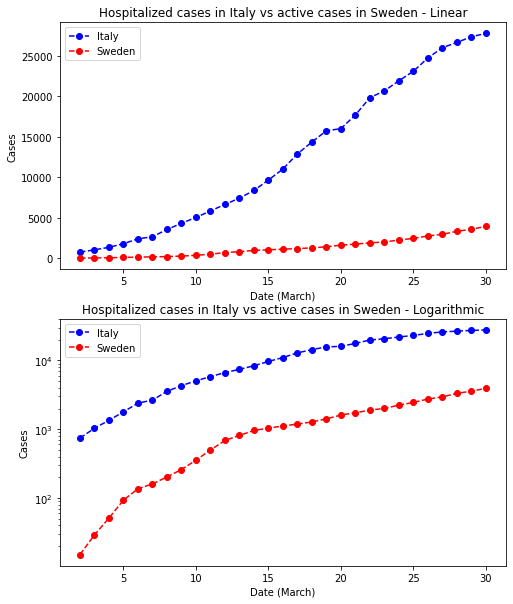

In [73]:
import numpy as np
import matplotlib.pyplot as plt

italy_hospitalized = [742, 1034, 1346, 1790, 2394, 2651, 3550, 4316,
                     5038, 5838, 6650, 7426, 8372, 9663, 11025,
                     12894, 14363, 15757, 16020, 17708, 19846, 
                     20692, 21937, 23112, 24753, 26029, 26676, 
                     27386, 27795]

sweden_active = [15, 29, 51, 93, 136, 160, 202, 259, 354, 498, 685,
                812, 958, 1036, 1113, 1187, 1276, 1412, 1607, 1734,
                1897, 2003, 2243, 2448, 2747, 2948, 3326, 
                3574, 3928]

x = np.arange(2, len(italy_hospitalized) + 2)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(x, italy_hospitalized, '--bo', label='Italy')
ax1.plot(x, sweden_active, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Hospitalized cases in Italy vs active cases in Sweden - Linear')
ax1.set_xlabel('Date (March)')
ax1.set_ylabel('Cases')

ax2 = fig.add_subplot(212)
ax2.plot(x, italy_hospitalized, '--bo', label='Italy')
ax2.plot(x, sweden_active, '--ro', label='Sweden')
ax2.legend(loc="upper left")
ax2.set_title('Hospitalized cases in Italy vs active cases in Sweden - Logarithmic')
ax2.set_xlabel('Date (March)')
ax2.set_ylabel('Cases')
ax2.set_yscale('log')

fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()

We then plot the daily increase for the same data and time period:

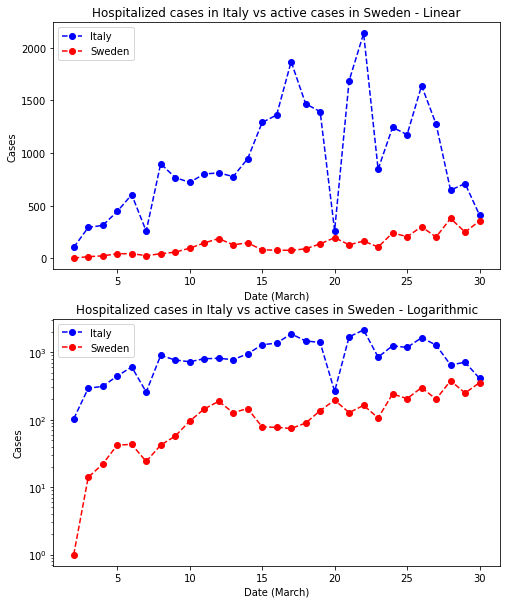

In [74]:
import numpy as np
import matplotlib.pyplot as plt


it_hosp_day = [103]
for i in range(1, len(italy_hospitalized)):
  it_hosp_day.append(italy_hospitalized[i] - italy_hospitalized[i - 1])

swe_active_day = [1]
for i in range(1, len(sweden_active)):
  swe_active_day.append(sweden_active[i] - sweden_active[i - 1])

x = np.arange(2, len(italy_hospitalized) + 2)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(x, it_hosp_day, '--bo', label='Italy')
ax1.plot(x, swe_active_day, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Hospitalized cases in Italy vs active cases in Sweden - Linear')
ax1.set_xlabel('Date (March)')
ax1.set_ylabel('Cases')

ax2 = fig.add_subplot(212)
ax2.plot(x, it_hosp_day, '--bo', label='Italy')
ax2.plot(x, swe_active_day, '--ro', label='Sweden')
ax2.legend(loc="upper left")
ax2.set_title('Hospitalized cases in Italy vs active cases in Sweden - Logarithmic')
ax2.set_xlabel('Date (March)')
ax2.set_ylabel('Cases')
ax2.set_yscale('log')

fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()

We then compare the swedish trend to the trend of hospitalized cases in Lombardy (10 million inhabitants), Emilia-Romagna (4.4 million inhabitants) and Veneto (4.9 million inhabitants), respectively the 1st, 2nd and 3rd region for number of cases.

The cases start from March 8, first day of Italy reporting hospitalized cases by region. This is in the attempt to distinguish italian trends from the trend of Lombardy, which is particularly severe. 

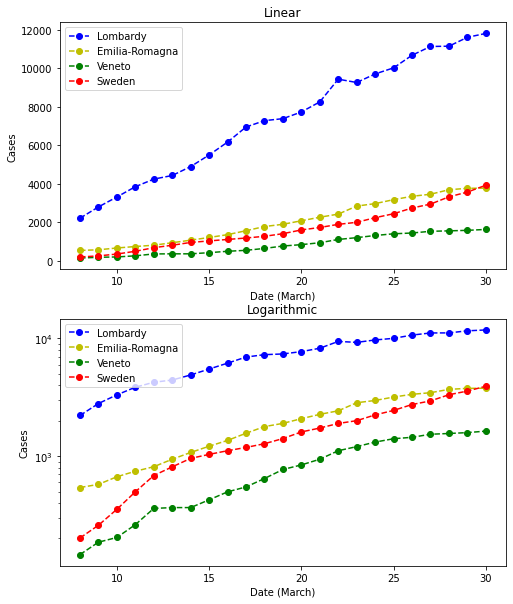

In [75]:
import numpy as np
import matplotlib.pyplot as plt

lom_hos = [2217, 2802, 3319, 3852, 4247, 4435, 
           4898, 5500, 6171, 6953, 7285, 7387,
           7735, 8258, 9439, 9266, 9711, 10026, 
           10681, 11137, 11152, 11613, 11815]

er_hos = [542, 576, 669, 745, 814, 942, 1076, 
          1215, 1362, 1566, 1784, 1900, 2083, 2267, 
          2429, 2846, 2974, 3180, 3354, 3461, 3695, 
          3769, 3779]

ve_hos = [146, 186, 204, 262, 360, 366, 366, 
          426, 498, 548, 646, 771, 843, 942, 1113,
          1206, 1318, 1407, 1447, 1536, 1559, 1586,
          1633]

sweden_active = [202, 259, 354, 498, 685, 812, 958, 1036, 
                 1113, 1187, 1276, 1412, 1607, 1734, 1897, 
                 2003, 2243, 2448, 2747, 2948, 3326, 3574,
                 3928]

x = np.arange(8, len(lom_hos) + 8)

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(x, lom_hos, '--bo', label='Lombardy')
ax1.plot(x, er_hos, '--yo', label='Emilia-Romagna')
ax1.plot(x, ve_hos, '--go', label='Veneto')
ax1.plot(x, sweden_active, '--ro', label='Sweden')
ax1.legend(loc="upper left")
ax1.set_title('Linear')
ax1.set_xlabel('Date (March)')
ax1.set_ylabel('Cases')

ax2 = fig.add_subplot(212)
ax2.plot(x, lom_hos, '--bo', label='Lombardy')
ax2.plot(x, er_hos, '--yo', label='Emilia-Romagna')
ax2.plot(x, ve_hos, '--go', label='Veneto')
ax2.plot(x, sweden_active, '--ro', label='Sweden')
ax2.legend(loc="upper left")
ax2.set_title('Logarithmic')
ax2.set_xlabel('Date (March)')
ax2.set_ylabel('Cases')
ax2.set_yscale('log')

fig.set_figheight(10)
fig.set_figwidth(8)
plt.show()